# Fandango Analysis

## Understanding the data

In [1]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [3]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


## Isolating the samples

In [5]:
sample_previous = fandango_previous.sample(10,random_state=1)
sample_after = fandango_after.sample(10,random_state=1)

In [6]:
sample_previous

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


In [7]:
sample_after

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [9]:
sum(sample_previous['Fandango_votes']<30)

0

## Datasets by year

In [13]:
fandango_2016 = fandango_after[fandango_after['year']==2016]

In [21]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
condition = fandango_previous['Year'] == '2015'
fandango_2015 = fandango_previous[condition]

In [22]:
print(fandango_2015['Year'].value_counts())

2015    129
Name: Year, dtype: int64


In [20]:
fandango_previous['Year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: object

In [25]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Visual Comparing

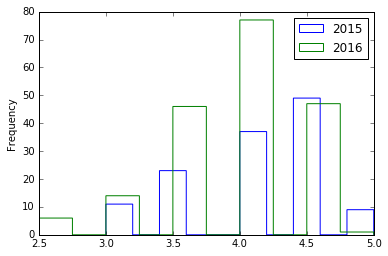

In [29]:
%matplotlib inline
fandango_2015['Fandango_Stars'].plot.hist(histtype = 'step', label = '2015', legend = True)
fandango_2016['fandango'].plot.hist(histtype = 'step', label = '2016', legend = True)

(0, 5)

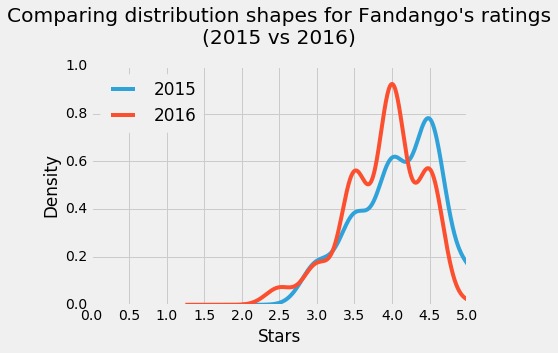

In [33]:
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', 
                                         legend = True,
                                        xticks = arange(0,5.5,0.5))

fandango_2016['fandango'].plot.kde(label = '2016', 
                                   legend = True,
                                  xticks = arange(0,5.5,0.5))

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5

## Analysing frequencies

In [35]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [36]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index()

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

## Statistics

In [43]:
moy_2015 = fandango_2015['Fandango_Stars'].mean()
med_2015 = fandango_2015['Fandango_Stars'].median()
mod_2015 = fandango_2015['Fandango_Stars'].mode()[0]

moy_2016 = fandango_2016['fandango'].mean()
med_2016 = fandango_2016['fandango'].median()
mod_2016 = fandango_2016['fandango'].mode()[0]

stats= {2015:{'moyenne':moy_2015,
              'médiane':med_2015,
              'mode':mod_2015},
       2016:{'moyenne':moy_2016,
              'médiane':med_2016,
              'mode':mod_2016}}

df_stats = pd.DataFrame(stats)
df_stats


,2015,2016
mode,4.500000,4.000000
moyenne,4.085271,3.887435
médiane,4.000000,4.000000


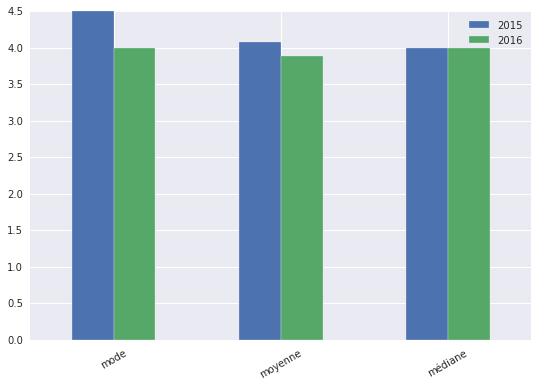

In [48]:
df_stats.plot.bar(rot=30)

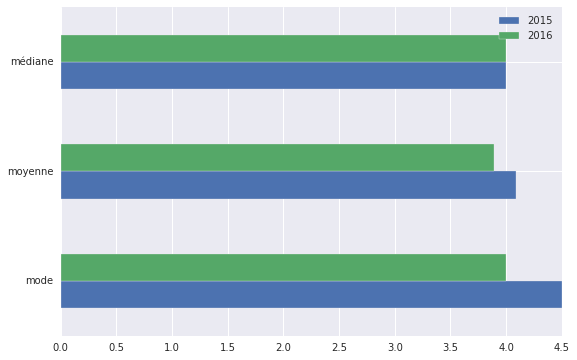

In [49]:
df_stats.plot.barh()

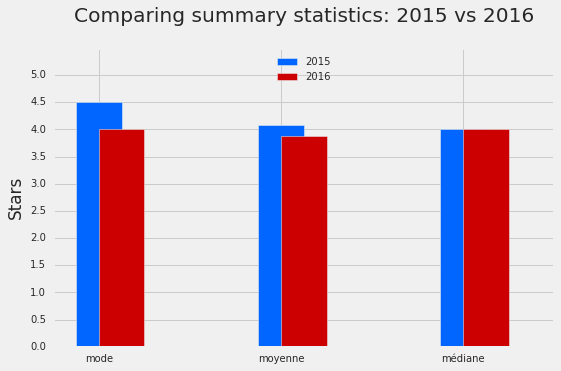

In [51]:
plt.style.use('fivethirtyeight')
df_stats[2015].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
df_stats[2016].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()